In [56]:
pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 9.1 MB/s eta 0:00:00


In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
import category_encoders as ce

In [59]:
Data = pd.read_csv("/content/Company_Data.csv")
Data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [60]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [61]:
encoder=ce.OrdinalEncoder(cols=['ShelveLoc','Urban', 'US'])
Data1=encoder.fit_transform(Data)

In [62]:
Sales_val = []
for value in Data["Sales"]:
    if value<=7.49:
        Sales_val.append("Low")
    else:
        Sales_val.append("High")
        
Data1["Sales_val"]= Sales_val
Data1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_val
0,9.50,138,73,11,276,120,1,42,17,1,1,High
1,11.22,111,48,16,260,83,2,65,10,1,1,High
2,10.06,113,35,10,269,80,3,59,12,1,1,High
3,7.40,117,100,4,466,97,3,55,14,1,1,Low
4,4.15,141,64,3,340,128,1,38,13,1,2,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,2,33,14,1,1,High
396,6.14,139,23,3,37,120,3,55,11,2,1,Low
397,7.41,162,26,12,368,159,3,40,18,1,1,Low
398,5.94,100,79,7,284,95,1,50,12,1,1,Low


In [63]:
X = Data1.drop(['Sales_val','Sales'], axis =1)
Y = Data1["Sales_val"]

In [64]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,1,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,3,59,12,1,1
3,117,100,4,466,97,3,55,14,1,1
4,141,64,3,340,128,1,38,13,1,2
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1
396,139,23,3,37,120,3,55,11,2,1
397,162,26,12,368,159,3,40,18,1,1
398,100,79,7,284,95,1,50,12,1,1


In [65]:
Y

0      High
1      High
2      High
3       Low
4       Low
       ... 
395    High
396     Low
397     Low
398     Low
399    High
Name: Sales_val, Length: 400, dtype: object

In [66]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=40)

### Building Decision Tree Classifier using Entropy Criteria

In [67]:
Model=DecisionTreeClassifier(criterion='entropy',max_depth=2)
Model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [68]:
preds = Model.predict(x_test)  
pd.Series(preds).value_counts()

High    91
Low     29
dtype: int64

In [70]:
pd.crosstab(y_test,preds)

col_0,High,Low
Sales_val,,
High,46,6
Low,45,23


In [71]:
np.mean(preds==y_test)

0.575

In [72]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

        High       0.88      0.51      0.64        91
         Low       0.34      0.79      0.47        29

    accuracy                           0.57       120
   macro avg       0.61      0.65      0.56       120
weighted avg       0.75      0.57      0.60       120



Text(0.5, 1.0, 'Decision tree using Entropy')

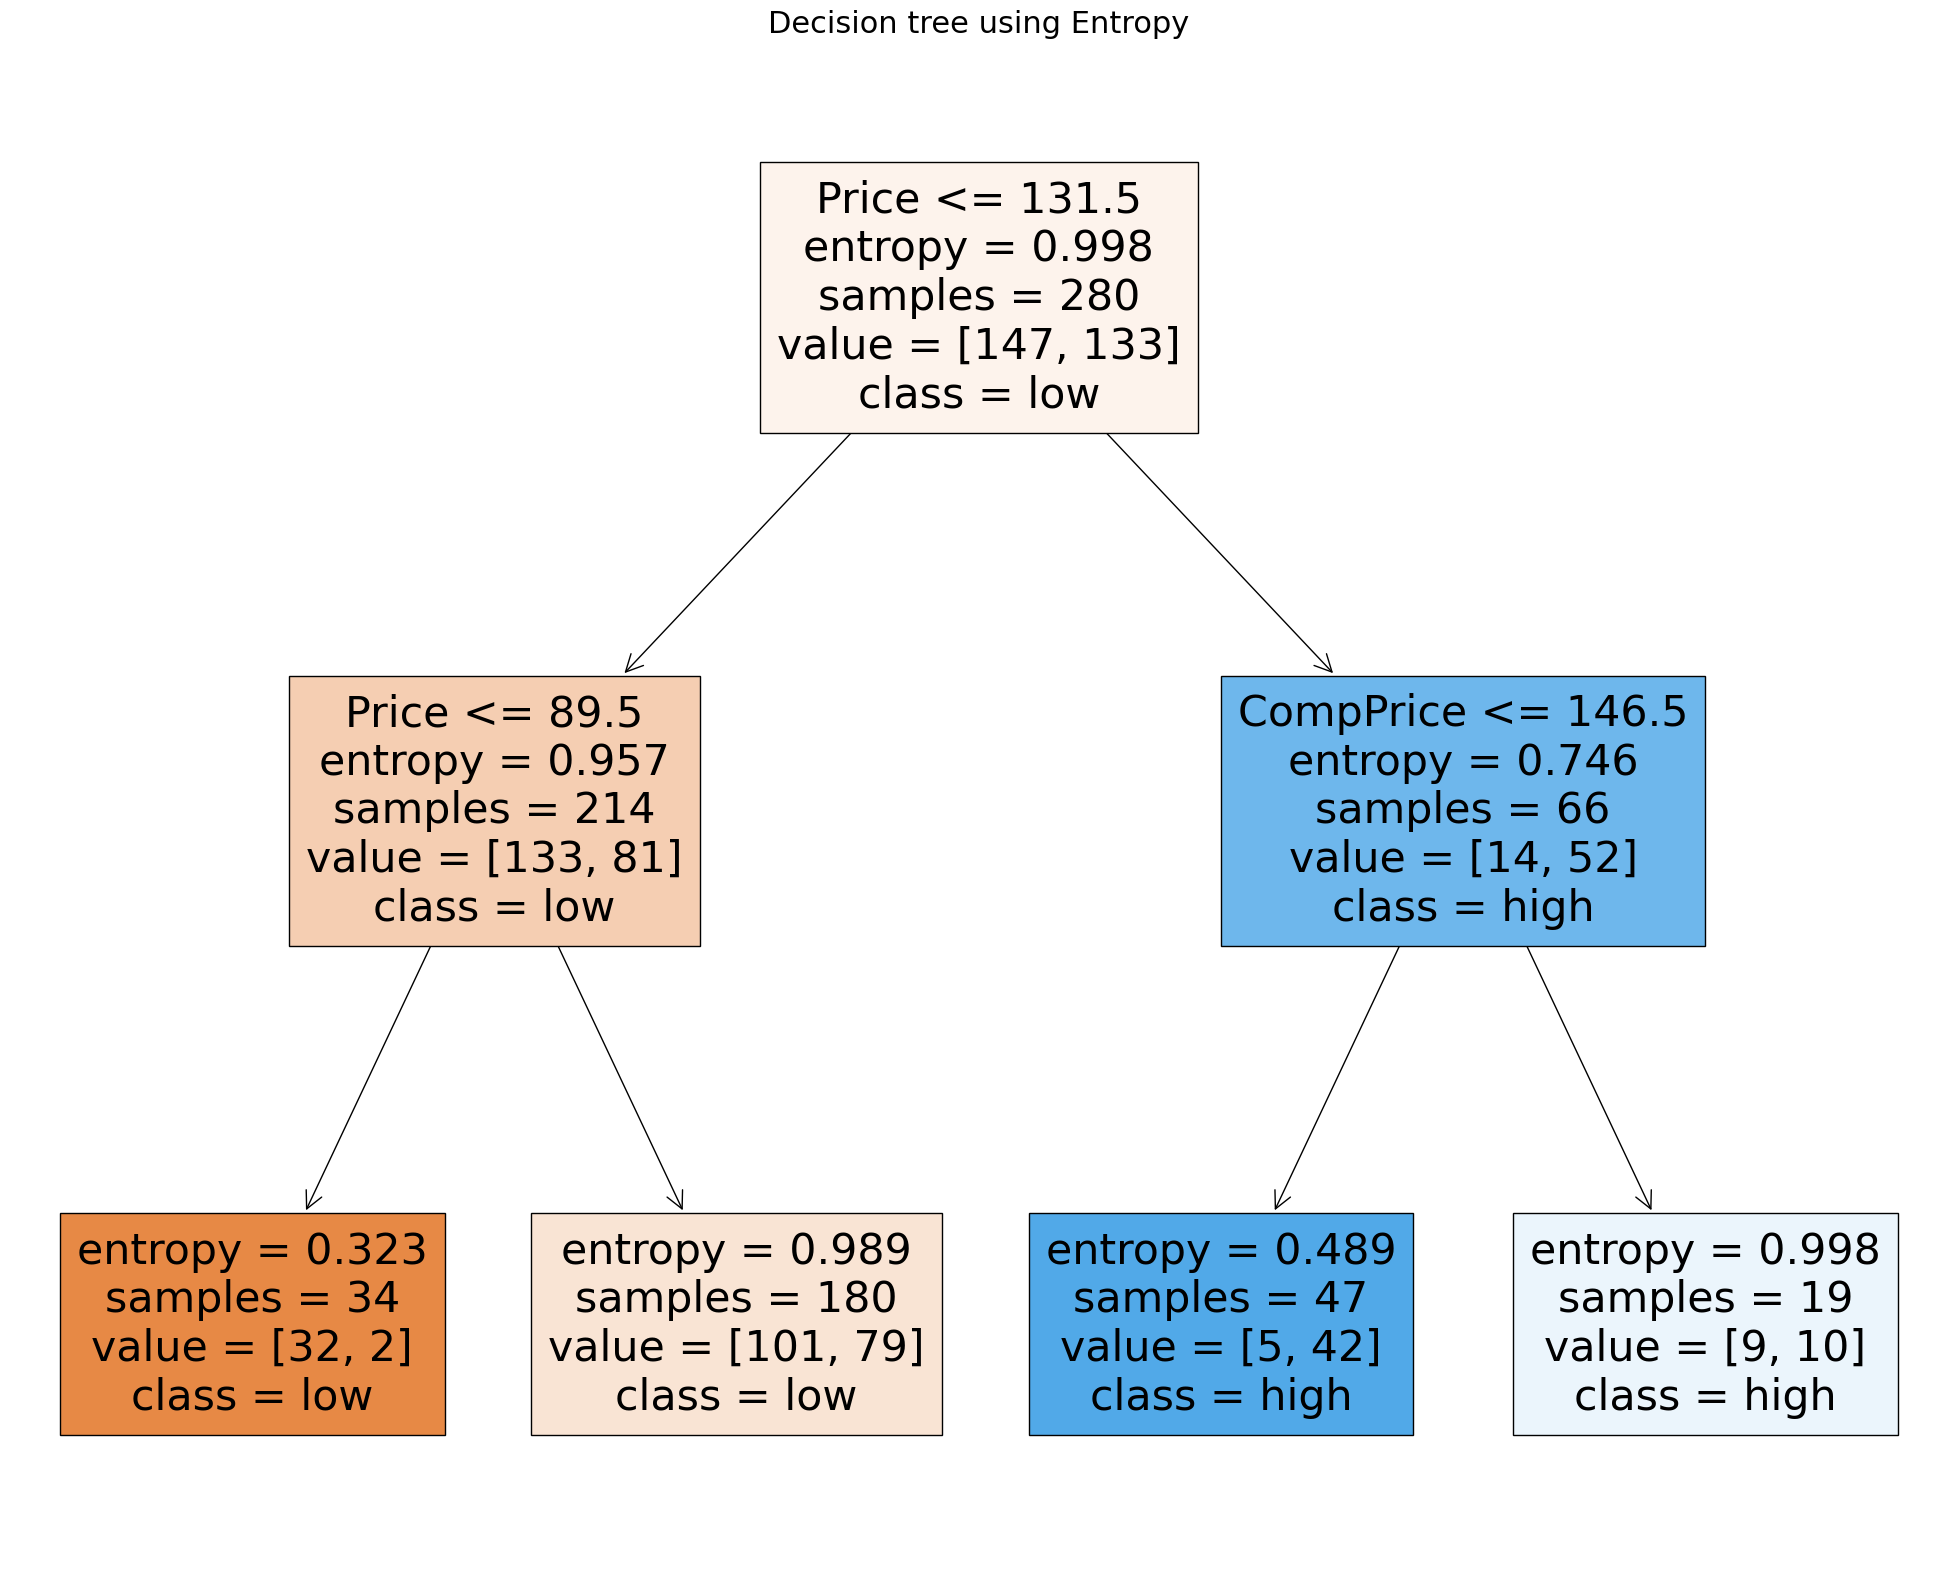

In [73]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(Model,feature_names= ['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education', 
                                     'Urban', 'US'], class_names= ['low', 'high'], filled=True)
plt.title('Decision tree using Entropy',fontsize=22)

### Building Decision Tree Classifier (CART) using Gini Criteria

In [76]:
from sklearn.tree import DecisionTreeClassifier
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=2)

In [77]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [78]:
pred=Model.predict(x_test)
np.mean(preds==y_test)

0.575

Text(0.5, 1.0, 'Decision tree using Entropy')

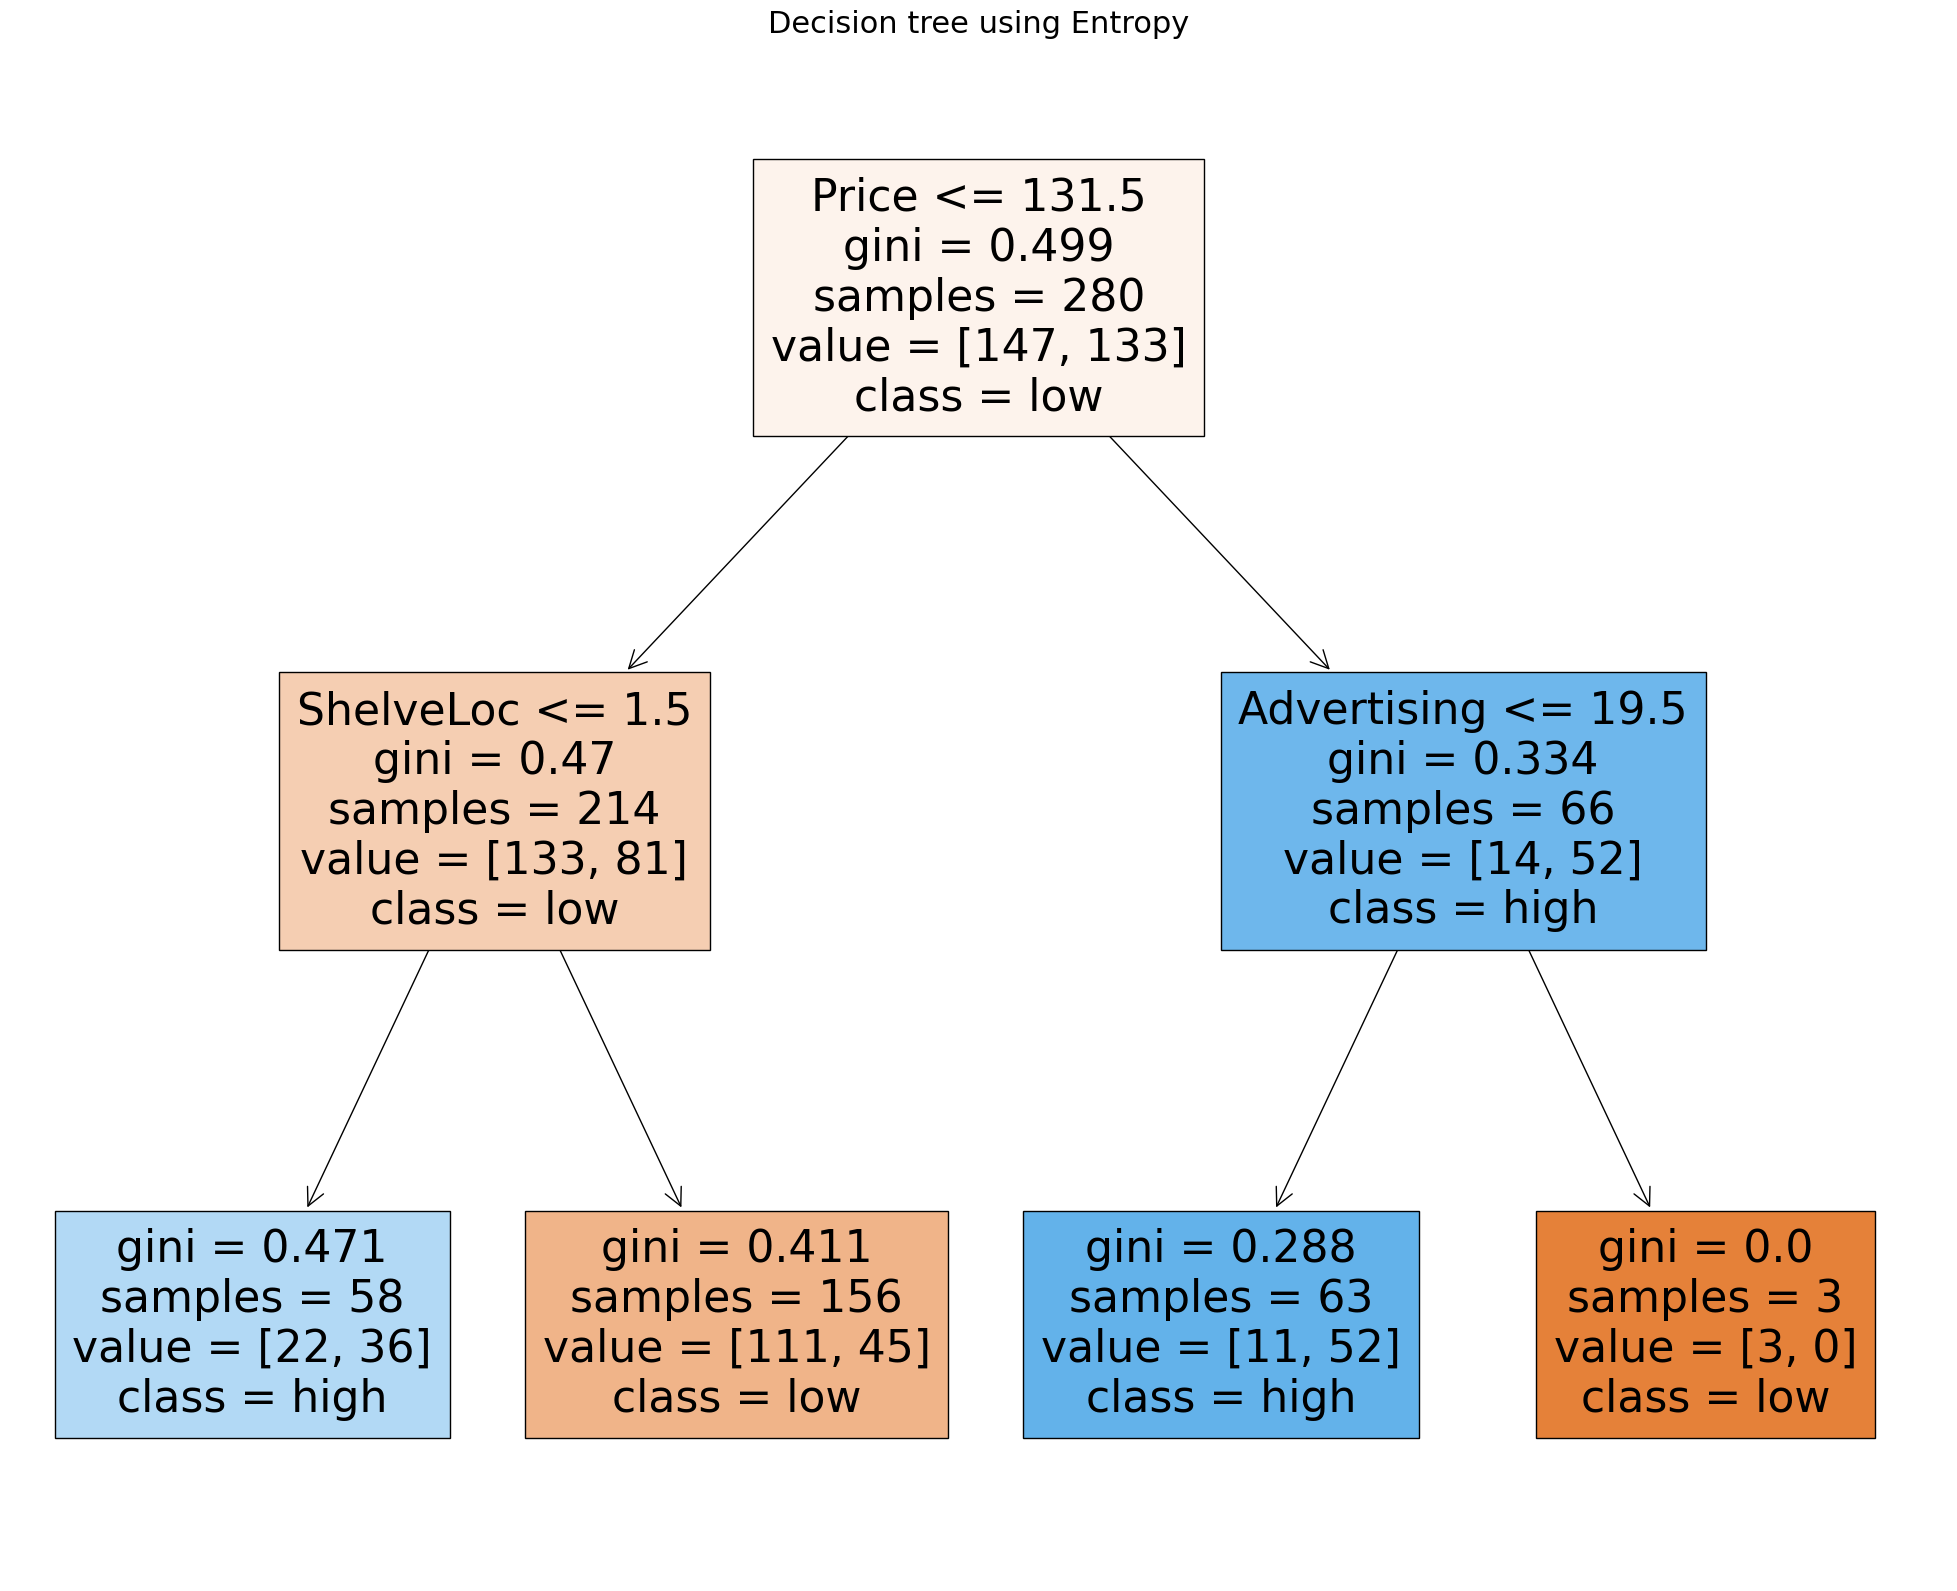

In [79]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model_gini,feature_names= ['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education', 
                                     'Urban', 'US'], class_names= ['low', 'high'], filled=True)
plt.title('Decision tree using Entropy',fontsize=22)